# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](https://github.com/subhrajyotidasgupta/hadron-collider-machine-learning/blob/master/week2/pic/pid.jpg?raw=1)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [0]:
data = pandas.read_csv('https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz')

In [4]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [44]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [45]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](https://github.com/subhrajyotidasgupta/hadron-collider-machine-learning/blob/master/week2/pic/features.jpeg?raw=1)

Also there are several combined features. The full list is following.

In [46]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['FlagSpd',
 'FlagRICH2',
 'PrsDLLbeElectron',
 'TrackQualityPerNDoF',
 'FlagBrem',
 'HcalE',
 'TrackNDoFSubdetector2',
 'RICHpFlagMuon',
 'EcalDLLbeMuon',
 'FlagHcal',
 'EcalDLLbeElectron',
 'RICH_DLLbeKaon',
 'RICHpFlagProton',
 'MuonFlag',
 'TrackQualitySubdetector2',
 'DLLmuon',
 'FlagPrs',
 'GhostProbability',
 'TrackDistanceToZ',
 'TrackPt',
 'DLLproton',
 'MuonLooseFlag',
 'BremDLLbeElectron',
 'RICH_DLLbeElectron',
 'RICH_DLLbeProton',
 'TrackNDoF',
 'Calo2dFitQuality',
 'FlagEcal',
 'DLLkaon',
 'SpdE',
 'EcalShowerLongitudinalParameter',
 'DLLelectron',
 'FlagMuon',
 'HcalDLLbeMuon',
 'MuonLLbeBCK',
 'TrackQualitySubdetector1',
 'Calo3dFitQuality',
 'HcalDLLbeElectron',
 'RICHpFlagElectron',
 'RICHpFlagKaon',
 'PrsE',
 'MuonLLbeMuon',
 'RICH_DLLbeBCK',
 'EcalE',
 'FlagRICH1',
 'RICH_DLLbeMuon',
 'TrackNDoFSubdetector1',
 'TrackP',
 'RICHpFlagPion']

### Divide training data into 2 parts

In [49]:
data[features].head()

,FlagSpd,FlagRICH2,PrsDLLbeElectron,TrackQualityPerNDoF,FlagBrem,HcalE,TrackNDoFSubdetector2,RICHpFlagMuon,EcalDLLbeMuon,FlagHcal,...,RICHpFlagKaon,PrsE,MuonLLbeMuon,RICH_DLLbeBCK,EcalE,FlagRICH1,RICH_DLLbeMuon,TrackNDoFSubdetector1,TrackP,RICHpFlagPion
0,1.0,1.0,-2.730674,1.467550,1.0,5586.589846,15.0,1.0,1.929960,1.0,...,1.0,10.422315,-0.661823,-21.913000,0.000001,1.0,-2.081143e-07,4.0,74791.156263,1.0
1,1.0,0.0,1.773806,3.570540,1.0,-0.000007,15.0,1.0,-2.061959,0.0,...,0.0,43.334935,-999.000000,-0.703617,1531.542000,1.0,2.771583e+00,10.0,2738.489989,1.0
2,0.0,0.0,-999.000000,0.826442,0.0,-999.000000,17.0,0.0,-999.000000,0.0,...,0.0,-999.000000,-999.000000,-999.000000,-999.000000,0.0,-9.990000e+02,5.0,2161.409908,0.0
3,1.0,1.0,-3.053104,1.076721,1.0,4482.803707,20.0,1.0,-3.253981,1.0,...,1.0,2.194175,-999.000000,-47.223118,4385.688000,1.0,-3.070819e+00,9.0,15277.730490,1.0
4,1.0,0.0,-2.730648,0.439767,1.0,5107.554680,19.0,1.0,-0.995816,1.0,...,0.0,0.000015,-999.000000,15.304688,1220.930044,1.0,-5.373712e+00,5.0,7563.700195,1.0


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[features])
scaled_data = pandas.DataFrame(scaler.transform(data[features]))
scaled_data.columns = features
scaled_data = scaled_data.join(data['Class'])

In [83]:
scaled_data.head()

,FlagSpd,FlagRICH2,PrsDLLbeElectron,TrackQualityPerNDoF,FlagBrem,HcalE,TrackNDoFSubdetector2,RICHpFlagMuon,EcalDLLbeMuon,FlagHcal,...,PrsE,MuonLLbeMuon,RICH_DLLbeBCK,EcalE,FlagRICH1,RICH_DLLbeMuon,TrackNDoFSubdetector1,TrackP,RICHpFlagPion,Class
0,0.414814,0.996025,0.414803,0.294663,0.512778,0.349519,0.061490,0.297396,0.479850,0.554401,...,0.397680,2.060854,0.140071,-0.410208,0.448614,0.229091,-0.705555,2.101859,0.405376,3
1,0.414814,-1.003991,0.427494,3.648808,0.512778,-0.377292,0.061490,0.297396,0.469492,-1.803749,...,0.488374,-0.485301,0.238662,-0.142461,0.448614,0.241996,1.220242,-0.480336,0.405376,1
2,-2.410719,-1.003991,-2.392225,-0.727866,-1.950162,-0.507261,0.556776,-3.362522,-2.117299,-1.803749,...,-2.383883,-0.485301,-4.401884,-0.584854,-2.229090,-4.422604,-0.384589,-0.501017,-2.466846,1
3,0.414814,0.996025,0.413894,-0.328686,0.512778,0.205918,1.299705,0.297396,0.466399,0.554401,...,0.375006,-0.485301,0.022418,0.356505,0.448614,0.214792,0.899276,-0.030960,0.405376,4
4,0.414814,-1.003991,0.414803,-1.344590,0.512778,0.287197,1.052062,0.297396,0.472259,0.554401,...,0.368960,-0.485301,0.313076,-0.196763,0.448614,0.204069,-0.384589,-0.307412,0.405376,5


In [84]:
scaled_data.columns
#scaled_data['Class'].head()

Index(['FlagSpd', 'FlagRICH2', 'PrsDLLbeElectron', 'TrackQualityPerNDoF',
       'FlagBrem', 'HcalE', 'TrackNDoFSubdetector2', 'RICHpFlagMuon',
       'EcalDLLbeMuon', 'FlagHcal', 'EcalDLLbeElectron', 'RICH_DLLbeKaon',
       'RICHpFlagProton', 'MuonFlag', 'TrackQualitySubdetector2', 'DLLmuon',
       'FlagPrs', 'GhostProbability', 'TrackDistanceToZ', 'TrackPt',
       'DLLproton', 'MuonLooseFlag', 'BremDLLbeElectron', 'RICH_DLLbeElectron',
       'RICH_DLLbeProton', 'TrackNDoF', 'Calo2dFitQuality', 'FlagEcal',
       'DLLkaon', 'SpdE', 'EcalShowerLongitudinalParameter', 'DLLelectron',
       'FlagMuon', 'HcalDLLbeMuon', 'MuonLLbeBCK', 'TrackQualitySubdetector1',
       'Calo3dFitQuality', 'HcalDLLbeElectron', 'RICHpFlagElectron',
       'RICHpFlagKaon', 'PrsE', 'MuonLLbeMuon', 'RICH_DLLbeBCK', 'EcalE',
       'FlagRICH1', 'RICH_DLLbeMuon', 'TrackNDoFSubdetector1', 'TrackP',
       'RICHpFlagPion', 'Class'],
      dtype='object')

In [85]:
training_data, validation_data = train_test_split(scaled_data, random_state=11, train_size=0.90)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [86]:
len(training_data), len(validation_data)

(1080000, 120000)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.3, random_state=13,
                                min_samples_leaf=100, max_depth=3)
gb.fit(training_data[features].values, training_data.Class.values)

CPU times: user 1min 22s, sys: 32 ms, total: 1min 22s
Wall time: 1min 22s


### Log loss on the cross validation sample

In [0]:
# predict each track
proba_gb = gb.predict_proba(validation_data[features].values)

In [0]:
log_loss(validation_data.Class.values, proba_gb)

0.66903316252217382

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [0]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils

In [0]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(1050, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    #model.add(Dense(500))
    #model.add(Activation('tanh'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [90]:
nn = nn_model(len(features))
nn.fit(training_data[features].values, np_utils.to_categorical(training_data.Class.values), verbose=1, nb_epoch=20, batch_size=256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
1080000/1080000 [==============================] - 31s 29us/step - loss: 0.7223
Epoch 2/20
1080000/1080000 [==============================] - 30s 27us/step - loss: 0.6514
Epoch 3/20
1080000/1080000 [==============================] - 31s 28us/step - loss: 0.6329
Epoch 4/20
1080000/1080000 [==============================] - 31s 28us/step - loss: 0.6210
Epoch 5/20
1080000/1080000 [==============================] - 28s 26us/step - loss: 0.6125
Epoch 6/20
1080000/1080000 [==============================] - 29s 27us/step - loss: 0.6062
Epoch 7/20
1080000/1080000 [==============================] - 29s 27us/step - loss: 0.6017
Epoch 8/20
1080000/1080000 [==============================] - 28s 26us/step - loss: 0.5979
Epoch 9/20
1080000/1080000 [==============================] - 28s 26us/step - loss: 0.5946
Epoch 10/20
1080000/1080000 [==============================] - 29s 27us/step - loss: 0.5918
Epoch 11/20
1080000/1080000 [==============================] - 33s 30us/step - loss: 0.58

### Log loss on the cross validation sample

In [0]:
# predict each track
proba_nn = nn.predict_proba(validation_data[features].values)

In [92]:
log_loss(validation_data.Class.values, proba_nn)

0.5812984455095342

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [0]:
proba = proba_nn

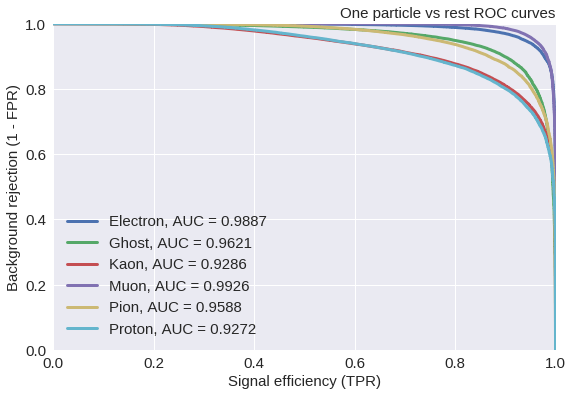

In [94]:
utils.plot_roc_curves(proba, validation_data.Class.values)

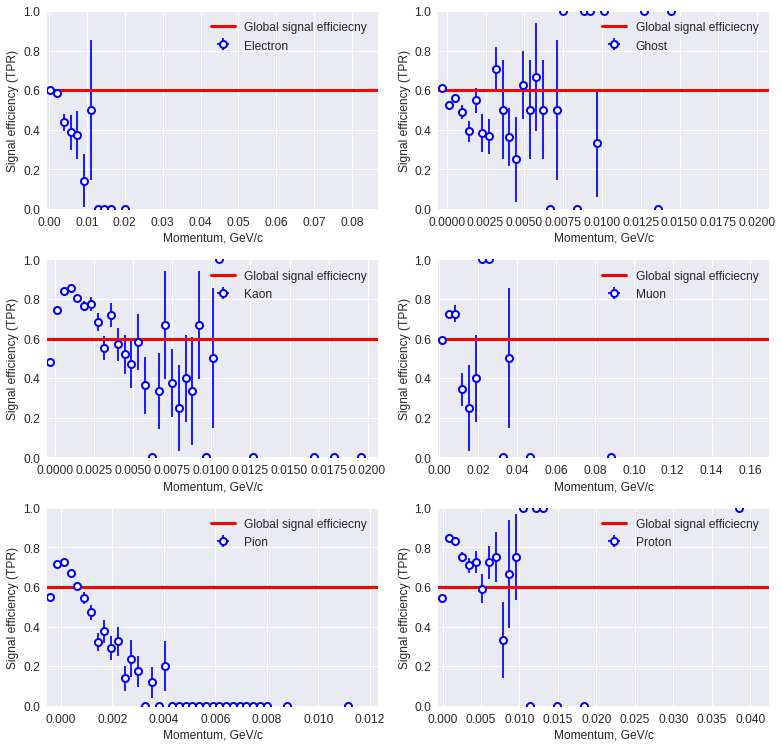

In [95]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

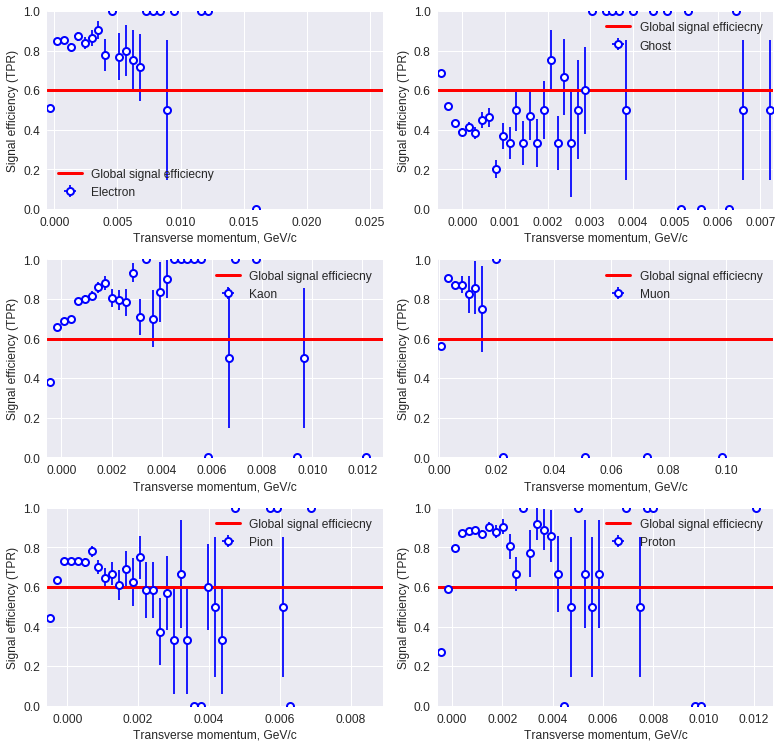

In [96]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [0]:
test = pandas.read_csv('https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/test.csv.gz')

In [0]:
best_model = nn

In [102]:
test.columns

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'RICH_DLLbeBCK', 'FlagRICH2', 'FlagBrem',
       'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon', 'RICH_DLLbeKaon',
       'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon', 'PrsE',
       'RICH_DLLbeMuon', 'RICH_DLLbeProton', 'ID'],
      dtype='object')

In [0]:
# predict test sample
submit_proba = best_model.predict_proba(test[features])
submit_ids = test.ID

In [105]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/content/submission_file.csv.gz